# <span style="color:purple">DAVID ROBINSON TIDYTUESDAY SCREENCAST</span>
<span style="color:orchid">**2024 Tidytuesday  Week 28** </span>

## Setup

### Libraries

In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
import circlify
import packcircles as pc
from matplotlib.cm import get_cmap

### Data

In [3]:
dfr = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-09/drob_funs.csv')


## EDA

### Overview

In [196]:
dfr.head(4)

,funs,pkgs,in_multiple_pkgs,contents,urls
0,set,(unknown),False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...
1,library,base,False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...
2,library,base,False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...
3,theme_set,ggplot,False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...


In [197]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13901 entries, 0 to 13900
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   funs              13901 non-null  object
 1   pkgs              13901 non-null  object
 2   in_multiple_pkgs  13901 non-null  bool  
 3   contents          13901 non-null  object
 4   urls              13901 non-null  object
dtypes: bool(1), object(4)
memory usage: 448.1+ KB


In [6]:
dfr.columns

Index(['funs', 'pkgs', 'in_multiple_pkgs', 'contents', 'urls'], dtype='object')

### Data Wrangling

#### Filtering data

  - keep functions with only known packages
  - keep only functions that exist in one package

In [30]:
df = dfr[(dfr.loc[:, 'pkgs'] != '(unknown)') & (~dfr.loc[:, 'in_multiple_pkgs'])].copy()
df.head()

,funs,pkgs,in_multiple_pkgs,contents,urls
1,library,base,False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...
2,library,base,False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...
3,theme_set,ggplot,False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...
4,theme_light,ggplot,False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...
5,tt_load,tidytuesdayR,False,2020_07_28_penguins.Rmd,https://raw.githubusercontent.com/dgrtwo/data-...


### Selecting columns

In [31]:
dd = df[['funs', 'pkgs']].copy()
dd.head()


,funs,pkgs
1,library,base
2,library,base
3,theme_set,ggplot
4,theme_light,ggplot
5,tt_load,tidytuesdayR


### Most used packages

In [198]:
packages = dd['pkgs'].value_counts().reset_index()
packages.head(10)

,pkgs,count
0,ggplot,4587
1,dplyr,2869
2,base,2046
3,forcats,492
4,tidyr,248
5,tune,194
6,stats,169
7,stringr,157
8,recipes,121
9,scales,114


In [37]:
pkg10 = packages.head(10)['pkgs'].to_list()
pkg10

['ggplot',
 'dplyr',
 'base',
 'forcats',
 'tidyr',
 'tune',
 'stats',
 'stringr',
 'recipes',
 'scales']

### Most used functions

In [142]:
funs = (
    dd[dd.loc[:, 'pkgs'].isin(pkg10)]
       .groupby(['funs', 'pkgs'])
       .value_counts()
       .reset_index(name = 'total')
       .sort_values('total', ascending=False)
       .reset_index(drop=True)
)

In [143]:
funs.head(5)

,funs,pkgs,total
0,aes,ggplot,955
1,ggplot,ggplot,813
2,mutate,dplyr,782
3,library,base,572
4,labs,ggplot,511


## Viz

### Packages count

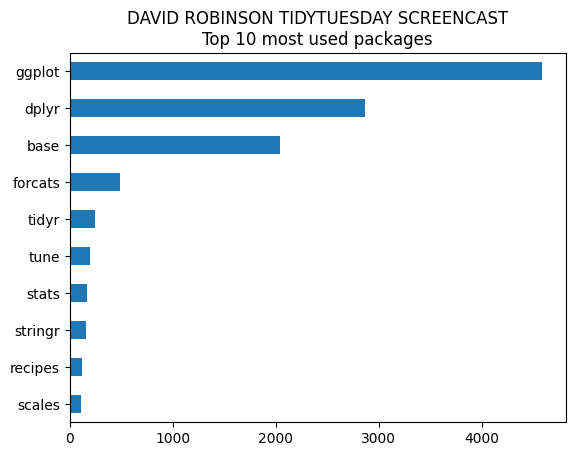

In [192]:
packages10 = packages.head(10).sort_values('count')

packages10.plot.barh(
    title = 'DAVID ROBINSON TIDYTUESDAY SCREENCAST\nTop 10 most used packages',
    x='pkgs', y = 'count', 
    ylabel='',
    legend = False)
plt.show()

### Circle packing with `circlify`

#### Basics

[Tutorial code source link](https://python-graph-gallery.com/circular-packing-1-level-hierarchy/)

__*Data*__

In [123]:
cdata = pd.DataFrame({
    'Name': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Value': [10, 2, 23, 87, 12, 65]
}).sort_values('Value', ascending=False)
cdata

,Name,Value
3,D,87
5,F,65
2,C,23
4,E,12
0,A,10
1,B,2


__*compute circle positions*__

`circlify()` function that does the computation. It requires as input:
 - data : A list of positive values sorted from largest to smallest
 - target_enclosure : (optional) A target enclosure where packed circles fit (default => unit circle (0, 0, 1))
 - show_enclosure : (optional) A boolean indicating if target enclosure should be appended (default => False)

In [124]:
circles = circlify.circlify(
    cdata['Value'].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
circles

[Circle(x=-0.44578608966292743, y=0.537367020215489, r=0.08132507760370634, level=1, ex={'datum': 2}),
 Circle(x=0.3494777859633366, y=0.7090955337283429, r=0.18184840179733308, level=1, ex={'datum': 10}),
 Circle(x=-0.08724389934418225, y=-0.48746607592300867, r=0.1992049434213246, level=1, ex={'datum': 12}),
 Circle(x=-0.09281533731572514, y=0.5915934875798542, r=0.27578675610580333, level=1, ex={'datum': 23}),
 Circle(x=-0.5363757253598688, y=0.0, r=0.46362427464013123, level=1, ex={'datum': 65}),
 Circle(x=0.46362427464013123, y=0.0, r=0.5363757253598688, level=1, ex={'datum': 87})]

__*Reverse the order of the circles to match the order of data*__

In [126]:
circles2 = circles[::-1]
circles2

[Circle(x=0.46362427464013123, y=0.0, r=0.5363757253598688, level=1, ex={'datum': 87}),
 Circle(x=-0.5363757253598688, y=0.0, r=0.46362427464013123, level=1, ex={'datum': 65}),
 Circle(x=-0.09281533731572514, y=0.5915934875798542, r=0.27578675610580333, level=1, ex={'datum': 23}),
 Circle(x=-0.08724389934418225, y=-0.48746607592300867, r=0.1992049434213246, level=1, ex={'datum': 12}),
 Circle(x=0.3494777859633366, y=0.7090955337283429, r=0.18184840179733308, level=1, ex={'datum': 10}),
 Circle(x=-0.44578608966292743, y=0.537367020215489, r=0.08132507760370634, level=1, ex={'datum': 2})]

__*Basic chart*__

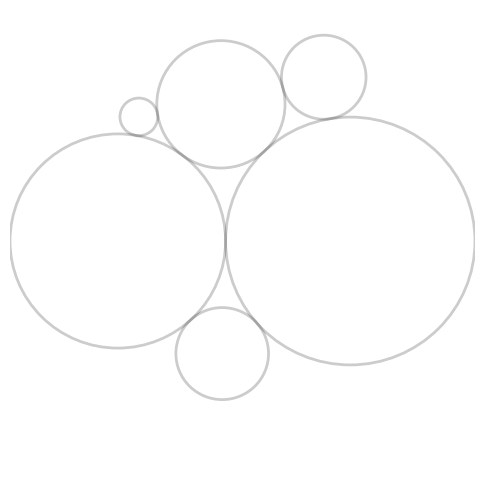

In [104]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles2
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle in circles2:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, fill=False))

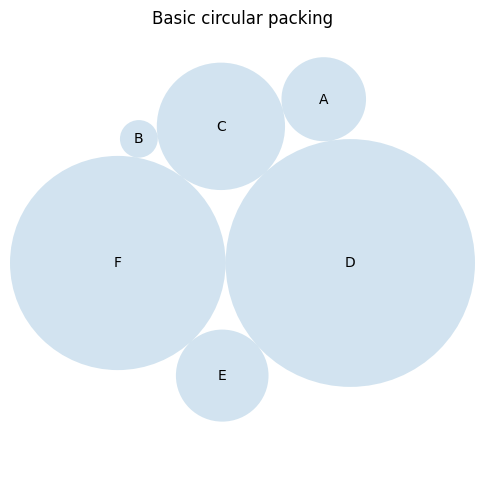

In [127]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Basic circular packing')
ax.axis('off')

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r,) for circle in circles2)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = cdata['Name']

# print circles
for circle, label in zip(circles2, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
        label,
        (x, y),
        va='center',
        ha='center'
    )

#### Top 20 most  used packages

In [138]:
pkg_data = packages.head(20)
pkg_data.head(2)  # already sorted

,pkgs,count
0,ggplot,4587
1,dplyr,2869


In [139]:
pcc = circlify.circlify(
    pkg_data['count'].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
pcc_rev = pcc[::-1]

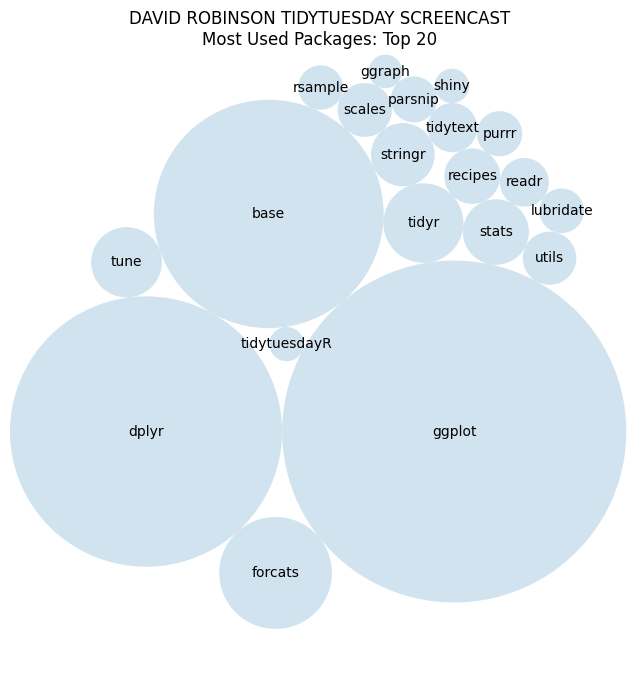

In [193]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('DAVID ROBINSON TIDYTUESDAY SCREENCAST\nMost Used Packages: Top 20')
ax.axis('off')

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r,) for circle in pcc_rev)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = pkg_data['pkgs']

# print circles
for circle, label in zip(pcc_rev, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
        label,
        (x, y),
        va='center',
        ha='center'
    )

In [141]:
funs

,funs,pkgs,total
0,aes,ggplot,955
1,ggplot,ggplot,813
2,mutate,dplyr,782
3,library,base,572
4,labs,ggplot,511
5,group_by,dplyr,360
6,fct_reorder,forcats,301
7,c,base,299
8,count,dplyr,263
9,geom_point,ggplot,225


#### Top 40 most used functions

In [144]:
funs_top30 = funs.head(30)
funs['pkgs'].value_counts()

pkgs
base       78
ggplot     61
dplyr      45
stats      24
recipes    21
stringr    19
tidyr      16
tune       13
forcats     8
scales      6
Name: count, dtype: int64

In [146]:
funs_top30.groupby('pkgs')['total'].sum()

pkgs
base       1354
dplyr      2468
forcats     444
ggplot     3758
Name: total, dtype: int64

__*Data Prep: Hierarchical data*__

In [147]:
fdata = [
    {'id': 'base', 
     'datum': 1354, 
     'children': [
         {'id': "mean", 'datum': 139},
         {'id': "sum", 'datum': 148},
         {'id': "library", 'datum': 572},
         {'id': "c", 'datum': 299},
         {'id': "is.na", 'datum': 196}
     ]
    },
    {'id': 'dplyr', 
     'datum': 2468, 
     'children': [
         {'id': "select", 'datum': 147},
         {'id': "n", 'datum': 127},
         {'id': "desc", 'datum': 179},
         {'id': "inner_join", 'datum': 87},
         {'id': "arrange", 'datum': 208},
         {'id': "summarize", 'datum': 220},
         {'id': "count", 'datum': 263},
         {'id': "group_by", 'datum': 360},
         {'id': "mutate", 'datum': 782},
         {'id': "ungroup", 'datum': 95}
     ]
    },
    {'id': 'forcats', 
     'datum': 444, 
     'children': [
         {'id': "fct_reorder", 'datum': 301},
         {'id': "fct_lump", 'datum': 143}
     ]
    },
    {'id': 'ggplot', 
     'datum': 3758, 
     'children': [
         {'id': "scale_x_log10", 'datum': 112},
         {'id': "theme_set", 'datum': 102},
         {'id': "theme_light", 'datum': 101},
         {'id': "expand_limits", 'datum': 135},
         {'id': "aes", 'datum': 955},
         {'id': "geom_col", 'datum': 193},
         {'id': "facet_wrap", 'datum': 159},
         {'id': "geom_line", 'datum': 216},
         {'id': "geom_point", 'datum': 225},
         {'id': "labs", 'datum': 511},
         {'id': "scale_y_continous", 'datum': 155},
         {'id': "scale_x_continous", 'datum': 81}
     ]
    }
]

In [148]:
fdata

[{'id': 'base',
  'datum': 1354,
  'children': [{'id': 'mean', 'datum': 139},
   {'id': 'sum', 'datum': 148},
   {'id': 'library', 'datum': 572},
   {'id': 'c', 'datum': 299},
   {'id': 'is.na', 'datum': 196}]},
 {'id': 'dplyr',
  'datum': 2468,
  'children': [{'id': 'select', 'datum': 147},
   {'id': 'n', 'datum': 127},
   {'id': 'desc', 'datum': 179},
   {'id': 'inner_join', 'datum': 87},
   {'id': 'arrange', 'datum': 208},
   {'id': 'summarize', 'datum': 220},
   {'id': 'count', 'datum': 263},
   {'id': 'group_by', 'datum': 360},
   {'id': 'mutate', 'datum': 782},
   {'id': 'ungroup', 'datum': 95}]},
 {'id': 'forcats',
  'datum': 444,
  'children': [{'id': 'fct_reorder', 'datum': 301},
   {'id': 'fct_lump', 'datum': 143}]},
 {'id': 'ggplot',
  'datum': 3758,
  'children': [{'id': 'scale_x_log10', 'datum': 112},
   {'id': 'theme_set', 'datum': 102},
   {'id': 'theme_light', 'datum': 101},
   {'id': 'expand_limits', 'datum': 135},
   {'id': 'aes', 'datum': 955},
   {'id': 'geom_col', 

In [150]:
fcc = circlify.circlify(
    fdata,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
fcc

[Circle(x=-0.12461839527423783, y=-0.4796721477212932, r=0.18985381759422565, level=1, ex={'id': 'forcats', 'datum': 444, 'children': [{'id': 'fct_reorder', 'datum': 301}, {'id': 'fct_lump', 'datum': 143}]}),
 Circle(x=-0.1394578849533819, y=0.6537499490125787, r=0.3315409530048831, level=1, ex={'id': 'base', 'datum': 1354, 'children': [{'id': 'mean', 'datum': 139}, {'id': 'sum', 'datum': 148}, {'id': 'library', 'datum': 572}, {'id': 'c', 'datum': 299}, {'id': 'is.na', 'datum': 196}]}),
 Circle(x=-0.5523448727137933, y=-0.007008389021854373, r=0.44761066635035557, level=1, ex={'id': 'dplyr', 'datum': 2468, 'children': [{'id': 'select', 'datum': 147}, {'id': 'n', 'datum': 127}, {'id': 'desc', 'datum': 179}, {'id': 'inner_join', 'datum': 87}, {'id': 'arrange', 'datum': 208}, {'id': 'summarize', 'datum': 220}, {'id': 'count', 'datum': 263}, {'id': 'group_by', 'datum': 360}, {'id': 'mutate', 'datum': 782}, {'id': 'ungroup', 'datum': 95}]}),
 Circle(x=0.4476054650114195, y=-0.00700838902185

__*Plotting: circlify + plt*__

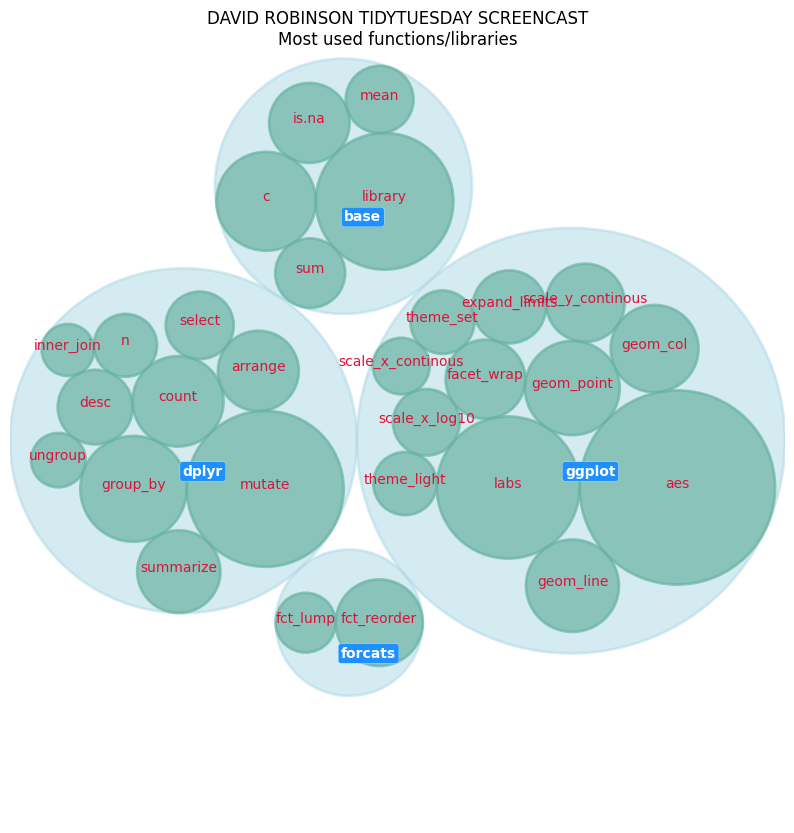

In [194]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('DAVID ROBINSON TIDYTUESDAY SCREENCAST\nMost used functions/libraries')
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in fcc
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (libraries):
for circle in fcc:
    if circle.level != 1:
        continue
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="lightblue"))

# Print circle and labels for the lowest level (functions):
for circle in fcc:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.7,
                 linewidth=2, color="#69b3a2"))
    plt.annotate(
        label, (x, y), 
        ha='center', 
        color="crimson")

# Print labels for the highest level (libraries)
for circle in fcc:
    if circle.level != 1:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x+.05, y-.08), 
                 va='center', ha='center', color = 'white', fontweight= 'bold',
                 bbox=dict(
                     fc='dodgerblue', 
                     linewidth = .2,
                     edgecolor='white', 
                     boxstyle='round', 
                     pad=.2))





### Circle packing with `packcircles`

#### Basics

In [221]:
pkg_data['count'] / sum(pkg_data['count']) * 100

0     39.034976
1     24.414943
2     17.411284
3      4.186878
4      2.110459
5      1.650923
6      1.438175
7      1.336057
8      1.029700
9      0.970130
10     0.944600
11     0.808442
12     0.791422
13     0.706323
14     0.680793
15     0.663773
16     0.663773
17     0.391456
18     0.391456
19     0.374436
Name: count, dtype: float64

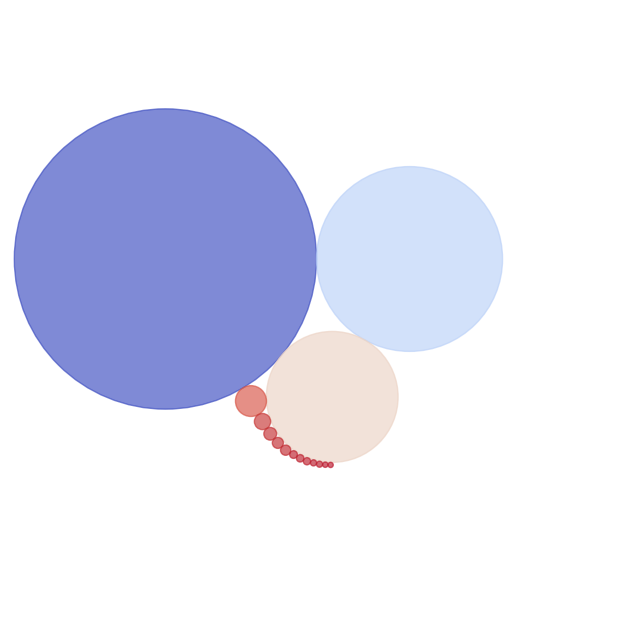

In [228]:
radii =  [39,24,17,4,2.1,1.65,1.43,1.33,1, .97,.94, .8, .79, .70, .68]

fig, ax = plt.subplots()
cmap = plt.colormaps['coolwarm_r']

circles = pc.pack(radii)
for (x,y,radius) in circles:
    patch = plt.Circle(
        (x,y),
        radius,
        color=cmap(radius/max(radii)),
        alpha=0.65
    )
    ax.add_patch(patch)
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set(xlim=(-80, 80), ylim=(-80, 80))
plt.axis('off')
plt.show()